<a href="https://colab.research.google.com/github/AylinNaebzadeh/NYC-Yellow-Taxi-Trip-Data-Analysis/blob/main/trip_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  pip install -U -q PyDrive --> for importing google drive in colab

# New Section

In [23]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import files
import numpy as np
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sklearn
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz 
from IPython.display import Image  
from sklearn import tree
import gdown
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
print(sklearn.__version__)

1.0.2


In [3]:
def delete_columns(df, del_columns):
  for col in del_columns:
    del df[col]
  return df

In [4]:
def download_csv_file():
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  link = 'https://drive.google.com/open?id=1Gepus8IDhEiXBzk3U0aQGlwgw99SRdLx'
  fluff, id = link.split('=')
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('sample-nyc-data.csv')  


In [5]:
def create_histogram(df):
  dataframe = df
  del_columns = ["tpep_pickup_datetime", "tpep_dropoff_datetime",
               "pickup_longitude", "pickup_latitude",
               "RatecodeID", "store_and_fwd_flag",
               "dropoff_longitude", "dropoff_latitude",
               "improvement_surcharge", "tolls_amount",
               "tip_amount", "mta_tax", "extra", "pickup_date", "dropoff_date", "drop_month", "pick_month"]
  for col in dataframe.columns:
    plt.hist(dataframe[col], edgecolor='white')
    plt.xlabel(col)
    plt.yscale("log")
    plt.show()

In [6]:
def calculate_min_max_var_avg(data):
    stats = pd.DataFrame()
    stats["min"] = data.min()
    stats["var"] = data.var()
    stats["avg"] = data.mean()
    stats["max"] = data.max()
    return stats

In [7]:
def convert_df_to_csv(df):
  df.to_csv('extended_data.csv')

In [8]:
def create_boxplot(data):
  """
  find an outlier using IQR method and box plot in 1-dimensional data.
  """
  new_data=data[['VendorID', 'passenger_count', 'trip_distance', 'payment_type',
                 'fare_amount', 'trip_duration_min', 'speed', 'total_amount', 'tip_amount']]
  for column in new_data:
    plt.figure()
    data.boxplot([column])

In [9]:
def normalize_min_max(df):
  cols = []
  del_columns = [
                "tpep_pickup_datetime", "tpep_dropoff_datetime",
                "pickup_longitude", "pickup_latitude",
                "RatecodeID", "store_and_fwd_flag",
                "dropoff_longitude", "dropoff_latitude",
                "improvement_surcharge",
                "mta_tax",  "pickup_date",
                "dropoff_date", "drop_month",
                "pick_month"]
  df = delete_columns(df, del_columns)
  for col in df.columns:
    max = df[col].loc[df[col].idxmax()]     
    min = df[col].loc[df[col].idxmin()]
    normalized_col=(df[col] - min)/(max-min)
    df[str(col) + "_normalized"] = normalized_col 
    cols.append(str(col) + "_normalized")
  df2 = df[cols]
  return df2

In [10]:
def clustering(df, df2):
  # ok columns with clustering: 'speed', 'total_amount', 'trip_distance', 'tip_amount', 'fare_amount'
  columns = ['speed_normalized', 'total_amount_normalized',
             'trip_distance_normalized', 'tip_amount_normalized',
             'fare_amount_normalized', 'passenger_count_normalized',
             'trip_duration_min_normalized']
  df2=df2[columns]
  # elbow_k_means(df2)
  kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(df2)
  centroids = kmeans.cluster_centers_
  df = df.assign(cluster=kmeans.labels_)

  #for 3d
  # fig = plt.figure(figsize=(12, 12))
  # ax = fig.add_subplot(projection='3d')
  # ax.scatter(df['trip_distance'], df['tip_amount'], df['passenger_count'], marker="s", c=df["cluster"], s=40, cmap="RdBu")

  # print("x: trip_distance, y: tip_amount")
  # plt.scatter(df['trip_distance'], df['tip_amount'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
  # plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
  # plt.show()

  # print("x: speed, y: tip_amount")
  # plt.scatter(df['speed'], df['tip_amount'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
  # plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
  # plt.show()

  # print("x: total_amount, y: tip_amount")
  # plt.scatter(df['total_amount'], df['tip_amount'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
  # plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
  # plt.show()

  # print("x: speed, y: trip_distance")
  # plt.scatter(df['speed'], df['trip_distance'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
  # plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
  # plt.show()

  # print("x: speed, y: trip_duration_min")
  # plt.scatter(df['speed'], df['trip_duration_min'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
  # plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
  # # plt.show()


  # print("x: passenger_count, y: trip_distance")
  # plt.scatter(df['passenger_count'], df['trip_distance'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
  # plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
  # plt.show()

  return df

In [11]:
def elbow_k_means(df):
  wcss = []
  for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(df)
    wcss.append(clustering.inertia_)
  
  ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  sns.lineplot(x = ks, y = wcss);


In [12]:
def create_correlation_matrix(data_df):
  new_data=data_df[['VendorID', 'passenger_count', 'RatecodeID', 'trip_distance', 'payment_type',
                 'fare_amount', 'trip_duration_hour', 'speed', 'total_amount', 'tip_amount']]

  label_encoder = LabelEncoder()
  data = new_data
  for i in range(len(data.columns)):
      column = new_data.columns[i]
      data[column] = label_encoder.fit_transform(new_data[column])
      print(f" dataframe {column} uniques: {len(data[column].unique())} ")

  x = data
  cor = x.corr().round(2)
  plt.figure(figsize=(10,8),linewidth=10,edgecolor="#04253a" )
  sns.heatmap(cor, annot=True, cmap="Blues")
  plt.show()

In [13]:
def calculate_Zscore(df):
  columns = list(df.columns)
  del_columns = ["tpep_pickup_datetime", "tpep_dropoff_datetime",
                 "pickup_longitude", "pickup_latitude",
                 "RatecodeID", "store_and_fwd_flag",
                 "dropoff_longitude", "dropoff_latitude",
                 "improvement_surcharge", "tolls_amount",
                 "tip_amount", "mta_tax", "extra", "pickup_date", "dropoff_date", "drop_month", "pick_month"]
  columns = [col for col in columns if col not in del_columns]
  for col in columns:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
  return df

In [14]:
def calculate_BoxWhiskerScore(df):
  columns = list(df.columns)
  del_columns = ["tpep_pickup_datetime", "tpep_dropoff_datetime",
                 "pickup_longitude", "pickup_latitude",
                 "RatecodeID", "store_and_fwd_flag",
                 "dropoff_longitude", "dropoff_latitude",
                 "improvement_surcharge", "tolls_amount",
                 "tip_amount", "mta_tax", "extra", "pickup_date", "dropoff_date", "drop_month", "pick_month",'payment_type']
  columns = [col for col in columns if col not in del_columns]
  for col in columns:
    if "_zscore" not in col:
      col_boxwhiskerscore = col + '_boxwhiskerscore'
      Q1 = np.percentile(df[col], 25, interpolation = 'midpoint')
      Q3 = np.percentile(df[col], 75, interpolation = 'midpoint')
      IQR = Q3 - Q1
      upper_bound = Q3+1.5*IQR
      df[col_boxwhiskerscore] = df[col]/upper_bound
  return df 

In [15]:
def del_missing_value(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = df.isnull().sum()/df.isnull().count().sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    # f, ax = plt.subplots(figsize=(15, 6))
    # plt.xticks(rotation='90')
    # sns.barplot(x=missing_data.index, y=missing_data['Percent'])
    # plt.xlabel('df', fontsize=15)
    # plt.ylabel('Percent of missing values', fontsize=15)
    # plt.title('Percent missing data by feature', fontsize=15)
    # missing_data

In [16]:
def pre_processing(df):
  df.drop_duplicates(inplace=True)
  del_missing_value(df)
  # Deleting data manually
  # df = df[df["speed"] < 200]
  df = df[df["speed"] != 0]
  # Calculate Z-Score and BoxWhisker-Score
  df = calculate_Zscore(df)
  df = calculate_BoxWhiskerScore(df)
  # Deleting data accoriding to Z-Score
  print("Before Z-Scoer: ", df.shape)
  for col in df.columns:
    try:
      df = df[df[col + "_zscore"] < 4]
      df = df[df[col + "_zscore"] > -4]
    except:
      pass
  print("After Z-Scoer: ", df.shape)
  df = df[df["trip_duration_min"] < 200]
  print("Deleting manually duration: ", df.shape)
  df = df[df["speed"] < 200]
  print("Deleting manually speed: ", df.shape)
  # Deleting data accoriding to BoxWhisker-Score
  # for col in df.columns:
  #   df = df[df[col + "_boxwhiskerscore"] > 4]
  # print("After BoxWhisker-Score: ", df.shape)
  # print(df.shape)

  return df

In [17]:
def add_features(df):
  # Adding new parameters
  df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
  df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])
  df["pickup_date"] = df["tpep_pickup_datetime"].dt.date 
  df["dropoff_date"] = df["tpep_dropoff_datetime"].dt.date
  df["pick_month"] = pd.DatetimeIndex(df['tpep_pickup_datetime']).month
  df["drop_month"] = pd.DatetimeIndex(df['tpep_dropoff_datetime']).month
  df["trip_duration_hour"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 3600
  df["trip_duration_min"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60
  # Deleting Durations
  df2 = df[~df["trip_duration_min"].isin([0])]
  # df = df[df["trip_duration_min"] < 180]
  # df = df[df["trip_duration_min"] != 0]
  df2["speed"] = df2["trip_distance"] * 1.6093435 / df2["trip_duration_hour"]
  pd.set_option('display.max_rows', None)
  # BoxWhiskerScore and Z-Score
  calculate_Zscore(df)
  calculate_BoxWhiskerScore(df)
  return df2

In [18]:
def count_payment_types_per_group(data):
  new_df =  data.groupby('payment_type').size().reset_index(name='count')
  return new_df

In [37]:
def decision_tree(data):
  X = data.drop(['VendorID', 'VendorID_zscore', 'VendorID_boxwhiskerscore', 'VendorID_normalized',
                 'VendorID_zscore_normalized', 'VendorID_boxwhiskerscore_normalized', 'cluster'], axis=1)
  y = data['cluster']

  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.25, random_state= 0)

  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  plt.figure(dpi=1200, figsize=(8, 6))
  classifier = DecisionTreeClassifier().fit(X_train, y_train)
  plot_tree(classifier, filled=True, max_depth=4)
  plt.title("Decision tree trained on all the NYC Taxi Trips features")
  plt.savefig('decision_tree.png', dpi=1200)
  plt.show()
  #  Prediction
  y_pred = classifier.predict(X_test) #Accuracy
  print('Accuracy Score:', accuracy_score(y_test,y_pred))

  #  Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  print('Confusion Matrix: ', cm)

  # visualization
  # export_graphviz(
  #       classifier,
  #       out_file="tree.dot",
  #       feature_names = classifier.feature_names_in_,
  #       class_names=['cluster'],
  #       rounded=True,
  #       filled=True
  #   )
  
  # view = Source.from_file("tree.dot")
  # view.render('tree', format='jpg',view=True)
  # view.view()
  
  
  



In [35]:
def main():
  download_csv_file()
  df = pd.read_csv('sample-nyc-data.csv', low_memory=False) # bad practice !!!!!!!!!!!!!!!!!!!
  new_df = count_payment_types_per_group(df)
  print(new_df)
  
  df = add_features(df)
  # convert_df_to_csv(df)
  df = pre_processing(df)
  df.to_csv('pre_proccessed.csv')
  # files.download("pre_proccessed.csv")

  # create_correlation_matrix(df)


  # clustering start
  df2 = normalize_min_max(df)
  df = clustering(df, df2)
  # df.to_csv("clustering.csv", encoding = 'utf-8-sig')
  # files.download("clustering.csv")
  if 'cluster' in df.columns:
    print("Cluster column exists")
  print(df.keys)
  # clustering end

  decision_tree(df)
  

   payment_type  count
0           1.0  60035
1           1.3      1
2           2.0  29553
3           2.2      1
4           3.0    300
5           4.0    112


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

Before Z-Scoer:  (89418, 43)
After Z-Scoer:  (87335, 43)
Deleting manually duration:  (87335, 43)
Deleting manually speed:  (87322, 43)
Cluster column exists


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



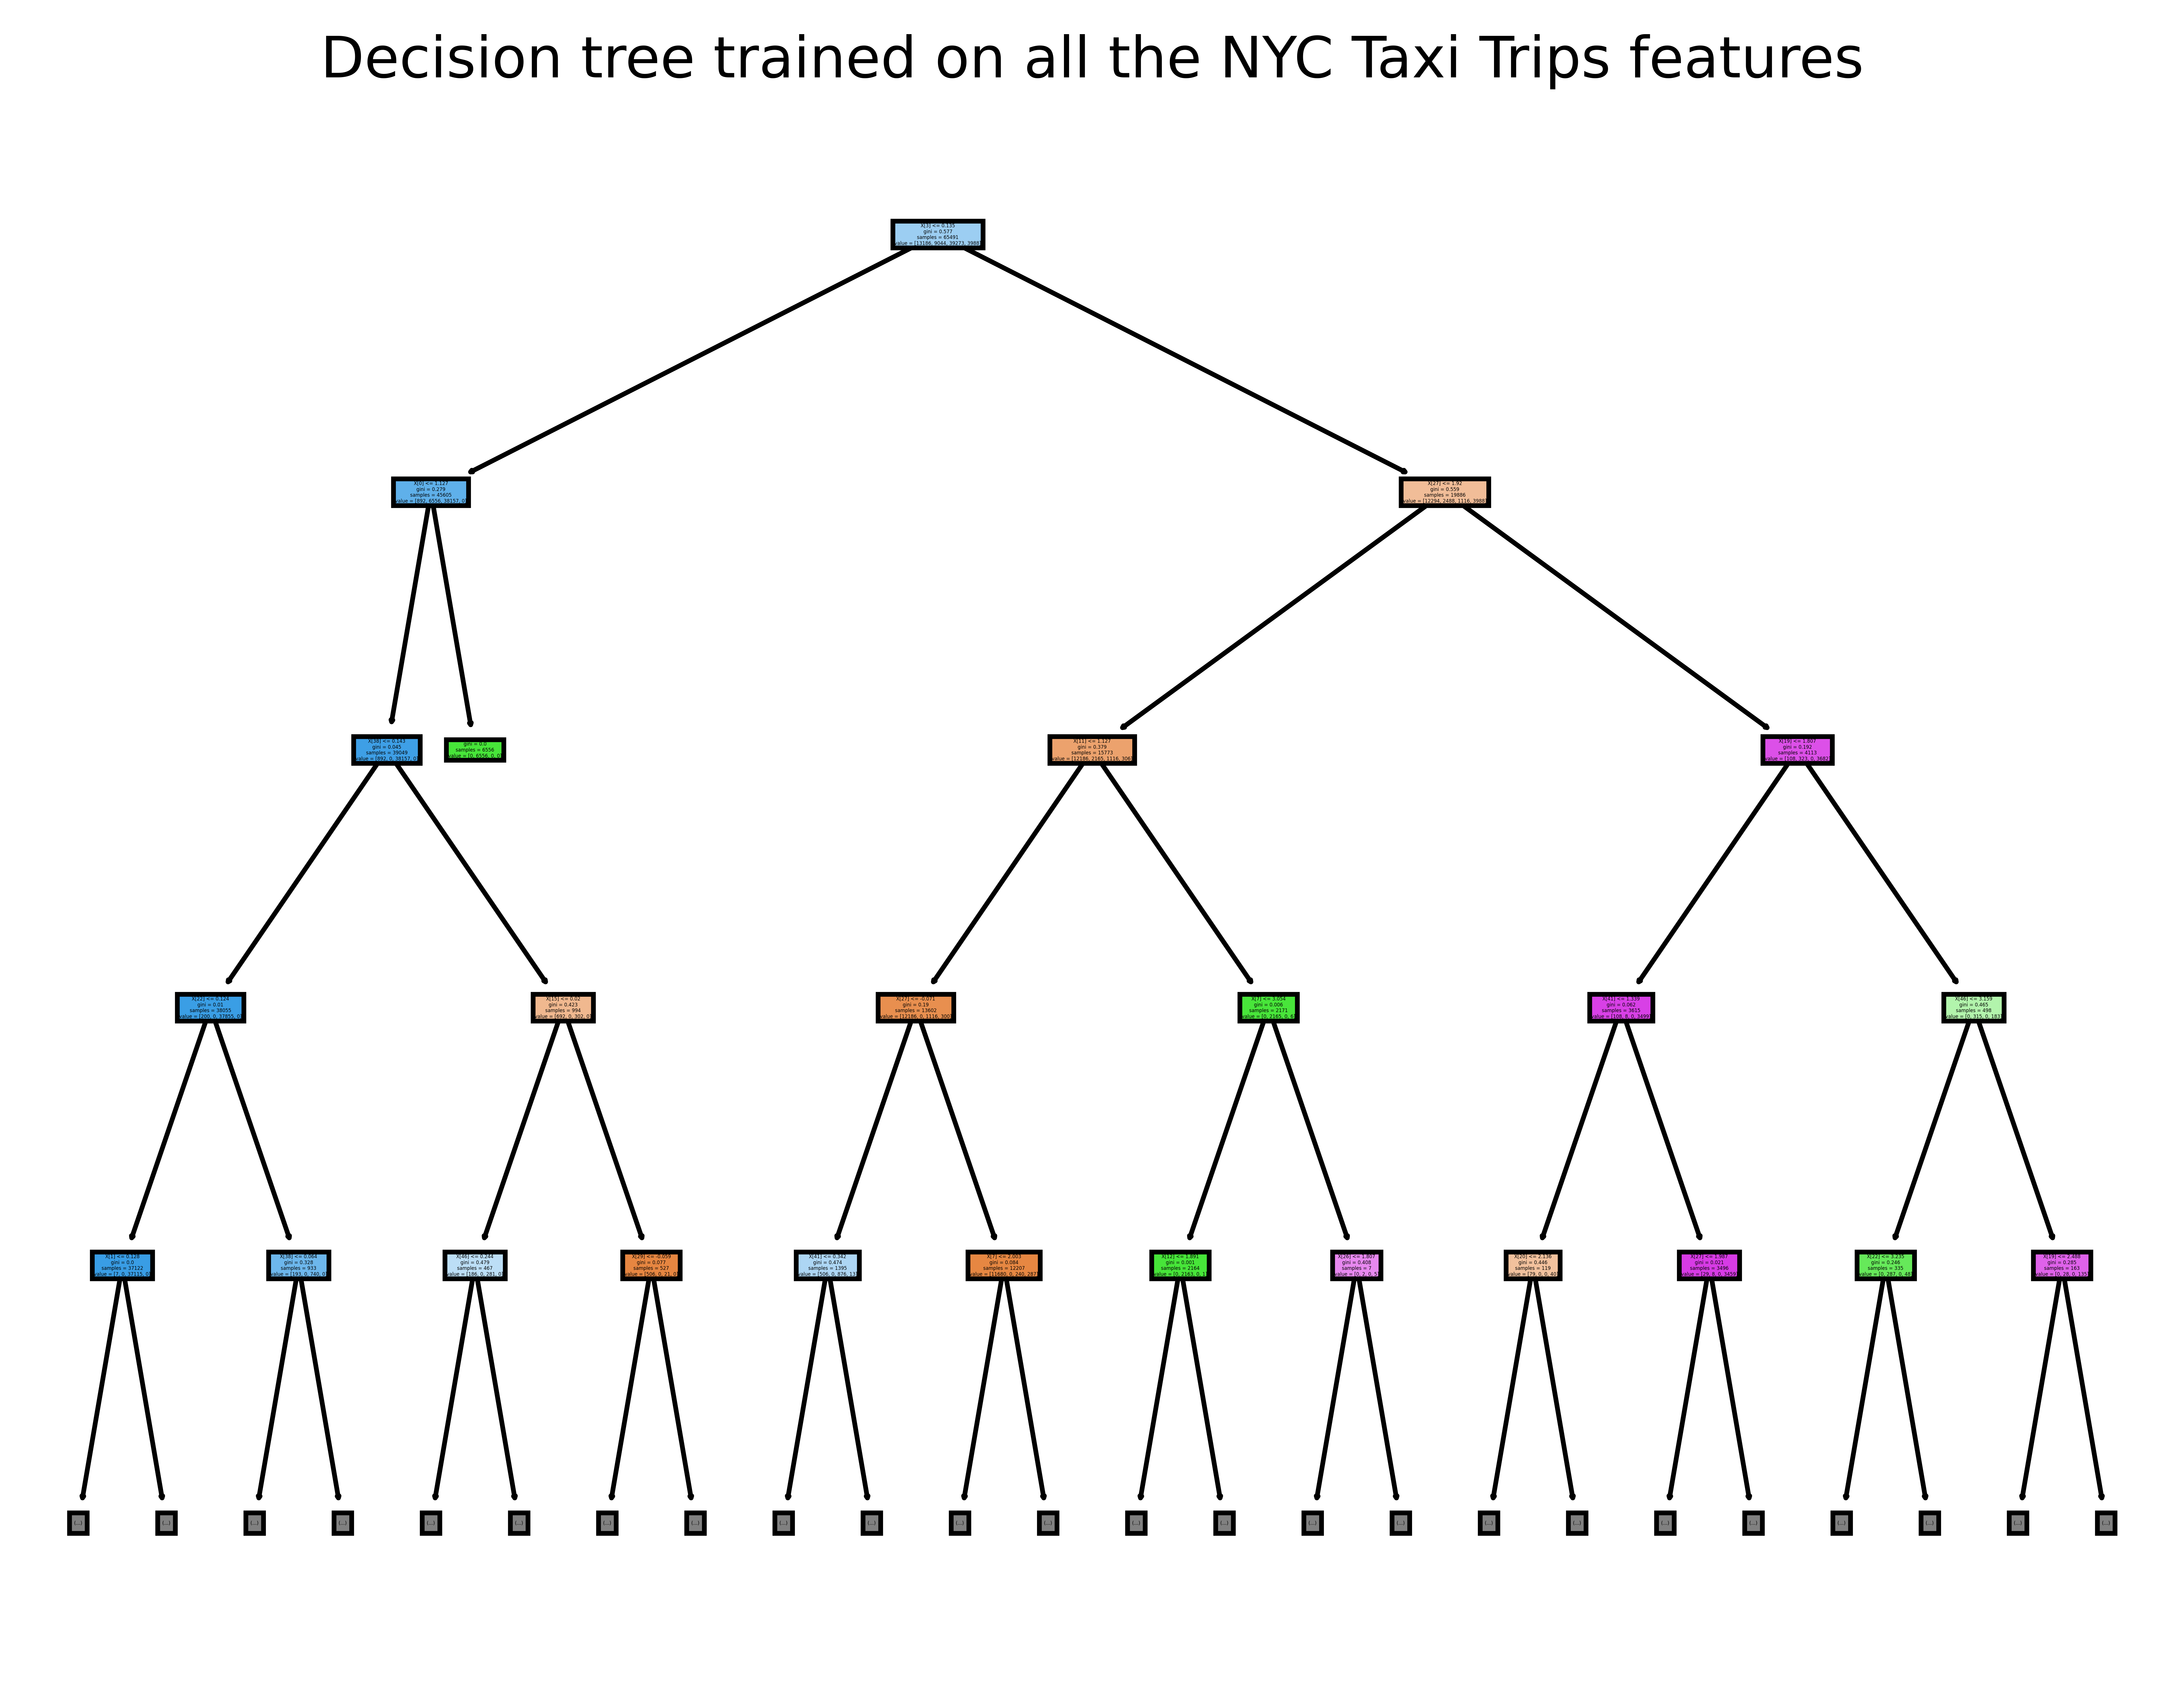

Accuracy Score: 0.9957858091704457
Confusion Matrix:  [[ 4388     0    25    23]
 [    1  2929     0     7]
 [   18     0 13132     0]
 [   13     5     0  1290]]


In [38]:
main()